<img src="../images/GA-logo.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Optimising Hospital Resourcing based on Weather Conditions

---
# Part 2B


<i>Note: this Jupyter notebook relies on the output of the data_preprocessing notebook (Part 1 & 2A). Please ensure that the file 'Monthly Weather Health Dataset.csv' exists in the data folder before running this notebook. </i>

---

### Contents:
- [Data Import](#Data-Import)
- [Coding Challenges](#Coding-Challenges)
- [Data Dictionary](#Data-Dictionary)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis-(EDA))
- [Conclusions and Recommendaations](#Conclusions-and-Recommendations)

---

## Data Import

This section imports python libraries necessary for subsequent Exploratory Data Analysis (EDA) and merged dataset from Part 1 & 2A.

In [1]:
# Imports:
# Import data wrangling libraries
import numpy as np
import pandas as pd

# Import plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Import merged dataset
df = pd.read_csv('../data/Monthly Weather Health Dataset.csv')

In [3]:
# Set index variable and convert to datetime for easier indexing
df['yrmth'] = pd.to_datetime(df['yrmth'])
df.set_index('yrmth', inplace=True)

# Set month and year variables as category dtype for easier analysis later
df['month'] = df['month'].astype('category')
df['year'] = df['year'].astype('category')

In [4]:
# Check info to see if merged dataset is imported as expected
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 420 entries, 1987-01-01 to 2021-12-01
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   maximum_rainfall_in_a_day  420 non-null    float64 
 1   no_of_rainy_days           420 non-null    float64 
 2   total_rainfall             420 non-null    float64 
 3   mean_sunshine_hrs          420 non-null    float64 
 4   temp_mean_daily_max        420 non-null    float64 
 5   mean_temp                  420 non-null    float64 
 6   wbt_mean                   420 non-null    float64 
 7   wbt_max                    420 non-null    float64 
 8   admissions                 192 non-null    float64 
 9   emergency                  420 non-null    float64 
 10  deaths                     420 non-null    float64 
 11  year                       420 non-null    category
 12  month                      420 non-null    category
dtypes: category(2), 

---

## Coding Challenges

This section runs the mean and standard deviation functions

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [5]:
# Function to calculate mean
def get_mean(x):
    """
    Function to obtain mean of list of numbers
    
    ...
    Attributes
    ----------
    x : list
        array to compute mean from
            
    Returns
    -------
    float
    
    """
    
    # Check that input is list
    if (not isinstance(x, list)):
        print("Invalid input. Please input a list!")
        return 
    
    # Check if all elements in list are numeric and convert all elements to float (e.g. bool to float)
    try:
        x = [float(i) for i in x]
    except ValueError:
        print("Input has non-numeric values. Please check all elements in input are numeric.")
        return
    
    # Compute mean
    count = 0
    total = 0
    for i in x:
        if i == i: # Check if i is nan, because nan values will not be equal to itself
            total += i
            count += 1

    return total/count

In [6]:
# Test invalid input
get_mean('oops')
get_mean(5)
get_mean(['re', 5, 7, -1])

# Test numeric lists
import numpy as np
print(get_mean([3,6,-9]) == np.mean([3,6,-9]))
print(get_mean([True, False, 5, 10]) == np.mean([True, False, 5, 10]))

Invalid input. Please input a list!
Invalid input. Please input a list!
Input has non-numeric values. Please check all elements in input are numeric.
True
True


2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [7]:
# Function to calculate mean
def get_sd(x):
    """
    Function to obtain standard deviation of list of numbers
    
    ...
    Attributes
    ----------
    x : list
        array to compute standard deviation from
            
    Returns
    -------
    float
    
    """
    
    # Check that input is list
    if (not isinstance(x, list)):
        print("Invalid input. Please input a list!")
        return 
    
    # Check if all elements in list are numeric and convert all elements to float (e.g. bool to float)
    try:
        x = [float(i) for i in x]
    except ValueError:
        print("Input has non-numeric values. Please check all elements in input are numeric.")
        return
    
    # Compute mean
    avg = get_mean(x)
    
    # Compute standard deviation
    count = 0
    total = 0
    for i in x:
        if i == i: # Check if i is nan, because nan values will not be equal to itself
            total += (i-avg)**2
            count += 1

    return (total/count)**0.5

In [8]:
# Test invalid input
get_mean('oops')
get_mean(5)
get_mean(['re', 5, 7, -1])

# Test numeric lists
print(get_sd([3,6,-9]) == np.std([3,6,-9]))
print(get_sd([True, False, 5, 10]) == np.std([True, False, 5, 10]))

Invalid input. Please input a list!
Invalid input. Please input a list!
Input has non-numeric values. Please check all elements in input are numeric.
True
True


---

## Data Dictionary

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**yrmth**|*string*|monthly weather health|The year and month of each data point (in YYYY-MM format).| 
|**maximum_rainfall_in_a_day**|*float*|monthly weather health|The maximum amount of rainfall within a day for the specific yrmth (units mm).|
|**no_of_rainy_days**|*float*|monthly weather health|The number of rainy days in the specific yrmth. A day is considered rainy if more than 0.2mm of rain fell.| 
|**total_rainfall**|*float*|monthly weather health|The total rainfall in the specific yrmth (units mm).| 
|**mean_sunshine_hrs**|*float*|monthly weather health|The mean hours of sunshine per day in the specific yrmth (units h).| 
|**temp_mean_daily_max**|*float*|monthly weather health|The mean of the daily maximum air temperature in the specific yrmth (units degree Celsius).| 
|**mean_temp**|*float*|monthly weather health|The mean of the daily mean air temperature in the specific yrmth (units degree Celsius).| 
|**wbt_mean**|*float*|monthly weather health|The mean of the daily mean wet-bulb temperature in the specific yrmth (units degree Celsius).| 
|**wbt_max**|*float*|monthly weather health|The mean of the daily maximum wet-bulb temperature in the specific yrmth (units degree Celsius).| 
|**admissions**|*float*|monthly weather health|The total number of inpatient admissions to public hospitals in the specific yrmth.| 
|**emergency**|*float*|monthly weather health|The total number of emergency cases to public hospitals in the specific yrmth.| 
|**deaths**|*float*|monthly weather health|The total number of daeth cases in the specific yrmth.| 
|**year**|*int*|monthly weather health|The year of the specific yrmth.| 
|**month**|*int*|monthly weather health|The month of the specific yrmth.| 


---

## Exploratory Data Analysis (EDA)

### Summary Statistics & Trends

In [9]:
# Generate summary statistics of variables
df.describe()

,maximum_rainfall_in_a_day,no_of_rainy_days,total_rainfall,mean_sunshine_hrs,temp_mean_daily_max,mean_temp,wbt_mean,wbt_max,admissions,emergency,deaths
count,420.000000,420.000000,420.000000,420.00000,420.000000,420.000000,420.000000,420.000000,192.000000,420.000000,420.000000
mean,52.719762,14.088095,178.323333,5.70500,31.558810,27.739286,25.309762,27.505952,41028.692708,59279.347619,1417.223810
std,35.579581,4.947876,114.865373,1.18889,0.845876,0.775154,0.582009,0.601540,6115.325325,17292.688019,239.807694
min,0.200000,1.000000,0.200000,3.00000,28.800000,25.500000,23.400000,25.700000,29498.000000,33988.000000,1006.000000
25%,31.075000,11.000000,91.750000,4.80000,31.000000,27.200000,25.000000,27.100000,35528.000000,43930.500000,1242.750000
50%,44.350000,14.000000,160.100000,5.70000,31.600000,27.800000,25.400000,27.500000,40356.000000,52302.000000,1362.000000
75%,64.050000,18.000000,238.675000,6.50000,32.100000,28.300000,25.700000,28.000000,46614.750000,77548.250000,1569.750000
max,216.200000,27.000000,765.900000,9.20000,34.100000,29.500000,26.900000,29.300000,54993.000000,98611.000000,2492.000000


In [10]:
# Generate standard deviations for numeric variables (i.e. exclude last 2 columns) from coding challenge functions
sd = {col:get_sd(list(df[col].values)) for col in df.iloc[:,:-2]}
sd

{'maximum_rainfall_in_a_day': 35.5371993555844,
 'no_of_rainy_days': 4.941982558647624,
 'total_rainfall': 114.72854723561026,
 'mean_sunshine_hrs': 1.1874738092349857,
 'temp_mean_daily_max': 0.8448688328203391,
 'mean_temp': 0.7742304715840447,
 'wbt_mean': 0.5813161917057096,
 'wbt_max': 0.6008230843474699,
 'admissions': 6099.379208024385,
 'emergency': 17272.0892167825,
 'deaths': 239.5220387608502}

#### Some observations from summary statistics:

`get_sd` function is working as expected, as the standard deviations obtained are the same as the `describe` method.

- <b>Rainfall variables</b>: rainfall vary significantly, from months with only 1 rainy day and less than 0.2mm of rain to months with rain almost every day and close to 800mm of rain. 

- <b>Sunshine variable</b>: number of hours of sunshine has a much smaller standard deviation which is not unexpected, given that max number of sunshine hours less than 12h.

- <b>Temperature variables</b>: ranges of max and mean air temperatures are higher than those of wet-bulb temperatures. Max temperatures tend to have a larger standard deviation than mean temperatures.

- <b>Admissions variable</b>: other than the fact that admissions data is only available for the last 192 months, i.e. from 2006 onwards, admissions number is generally in the tens of thousands and relatively stable with a standard deviation of around 6,000.

- <b>Emergency variable</b>: emergency numbers tend to vary quite significantly with a large standard deviation of 17k, and a large range with a low min of 34k to a high max of 99k.

- <b>Deaths variable</b>: death numbers are relative stable with a standard deviation of less than 300, but very large range suggesting some outliers.

In [11]:
# See trends for total rainfall and rainy days in 1990, 2000, 2010 and 2020

print('----------')
for year in [1990,2000,2010,2020]:
    print(f'### Statistics for {year} ###')
    # month with highest total rainfall
    print('Month with highest total rainfall:')
    print(df[df['year'] == year].sort_values(by='total_rainfall', ascending=False).head(1)['total_rainfall'])

    # month with lowest total rainfall
    print('Month with lowest total rainfall:')
    print(df[df['year'] == year].sort_values(by='total_rainfall', ascending=True).head(1)['total_rainfall'])

    # month with highest number of rainy days
    print('Month with highest number of rainy days:')
    print(df[df['year'] == year].sort_values(by='no_of_rainy_days', ascending=False).head(1)['no_of_rainy_days'])

    # month with lowest number of rainy days
    print('Month with lowest number of rainy days:')
    print(df[df['year'] == year].sort_values(by='no_of_rainy_days', ascending=True).head(1)['no_of_rainy_days'])

    print('\n')
    
print('----------')    

# year with highest total rainfall
print('Year with highest total rainfall:')
print(df.groupby('year').sum().sort_values(by='total_rainfall', ascending=False).head(1)['total_rainfall'])

# year with lowest total rainfall
print('Year with lowest total rainfall:')
print(df.groupby('year').sum().sort_values(by='total_rainfall', ascending=True).head(1)['total_rainfall'])

# year with highest number of rainy days
print('Year with highest number of rainy days:')
print(df.groupby('year').sum().sort_values(by='no_of_rainy_days', ascending=False).head(1)['no_of_rainy_days'])

# year with lowest number of rainy days
print('Year with lowest number of rainy days:')
print(df.groupby('year').sum().sort_values(by='no_of_rainy_days', ascending=True).head(1)['no_of_rainy_days'])


----------
### Statistics for 1990 ###
Month with highest total rainfall:
yrmth
1990-09-01    204.5
Name: total_rainfall, dtype: float64
Month with lowest total rainfall:
yrmth
1990-02-01    24.1
Name: total_rainfall, dtype: float64
Month with highest number of rainy days:
yrmth
1990-09-01    17.0
Name: no_of_rainy_days, dtype: float64
Month with lowest number of rainy days:
yrmth
1990-03-01    4.0
Name: no_of_rainy_days, dtype: float64


### Statistics for 2000 ###
Month with highest total rainfall:
yrmth
2000-11-01    385.7
Name: total_rainfall, dtype: float64
Month with lowest total rainfall:
yrmth
2000-09-01    81.1
Name: total_rainfall, dtype: float64
Month with highest number of rainy days:
yrmth
2000-11-01    21.0
Name: no_of_rainy_days, dtype: float64
Month with lowest number of rainy days:
yrmth
2000-05-01    10.0
Name: no_of_rainy_days, dtype: float64


### Statistics for 2010 ###
Month with highest total rainfall:
yrmth
2010-07-01    298.5
Name: total_rainfall, dtype: float6

In [12]:
# Outlier months by total rainfall (defined as more than 3 std away from mean)
df[(df['total_rainfall'] > df['total_rainfall'].mean() + 3 * df['total_rainfall'].std()) |
(df['total_rainfall'] < df['total_rainfall'].mean() - 3 * df['total_rainfall'].std())]

,maximum_rainfall_in_a_day,no_of_rainy_days,total_rainfall,mean_sunshine_hrs,temp_mean_daily_max,mean_temp,wbt_mean,wbt_max,admissions,emergency,deaths,year,month
yrmth,,,,,,,,,,,,,
1987-01-01,127.4,16.0,568.6,4.0,28.8,25.5,23.7,25.7,NaN,37771.0,1123.0,1987,1
2001-12-01,211.1,20.0,609.0,4.5,30.7,26.7,24.9,27.4,NaN,46547.0,1326.0,2001,12
2004-01-01,177.8,13.0,600.9,6.7,30.6,26.9,25.1,27.3,NaN,48268.0,1357.0,2004,1
2006-12-01,198.0,22.0,765.9,3.2,30.0,26.6,25.1,27.9,33747.0,57943.0,1415.0,2006,12
2021-01-01,210.6,17.0,692.8,4.2,29.1,26.0,23.7,26.0,46888.0,76872.0,1871.0,2021,1


On the overall dataset level, there are 5 outlier months when total rainfall is more than 3 standard deviations from mean. There will likely be more outliers when analysed at the month level.

In [13]:
# Outlier months by number of rainy days (defined as more than 3 std away from mean)
df[(df['no_of_rainy_days'] > df['no_of_rainy_days'].mean() + 3 * df['no_of_rainy_days'].std()) |
(df['no_of_rainy_days'] < df['no_of_rainy_days'].mean() - 3 * df['no_of_rainy_days'].std())]

,maximum_rainfall_in_a_day,no_of_rainy_days,total_rainfall,mean_sunshine_hrs,temp_mean_daily_max,mean_temp,wbt_mean,wbt_max,admissions,emergency,deaths,year,month
yrmth,,,,,,,,,,,,,


On the overall dataset level, there are no outlier months for number of rainy days.

In [14]:
# Which month had highest mean number of hospital admissions
df_by_mth = df.groupby(df.index.month).mean()

df_by_mth.sort_values(by='admissions', ascending=False).head()
# Observations: looks like Jul and Oct have the highest number of admissions

,maximum_rainfall_in_a_day,no_of_rainy_days,total_rainfall,mean_sunshine_hrs,temp_mean_daily_max,mean_temp,wbt_mean,wbt_max,admissions,emergency,deaths
yrmth,,,,,,,,,,,
7,41.868571,13.457143,150.362857,6.108571,31.440000,28.131429,25.528571,27.514286,42526.1875,60934.257143,1434.685714
10,44.562857,14.828571,158.608571,5.065714,31.782857,27.860000,25.331429,27.445714,42350.4375,59204.600000,1410.485714
3,45.762857,12.257143,155.765714,6.360000,32.185714,27.780000,25.245714,27.582857,42161.2500,60483.257143,1454.628571
12,74.705714,18.542857,302.648571,4.428571,30.540000,26.762857,24.791429,27.234286,41777.0625,59613.428571,1447.057143
8,47.511429,14.257143,152.022857,5.848571,31.357143,27.982857,25.394286,27.465714,41420.0625,60130.114286,1402.314286


In [15]:
# Which month had highest mean number of emergencies
df_by_mth.sort_values(by='emergency', ascending=False).head()
# Observations: looks like Jan and May have the highest number of emergencies, Jul is a close 3rd

,maximum_rainfall_in_a_day,no_of_rainy_days,total_rainfall,mean_sunshine_hrs,temp_mean_daily_max,mean_temp,wbt_mean,wbt_max,admissions,emergency,deaths
yrmth,,,,,,,,,,,
1,81.188571,13.514286,242.362857,5.702857,30.517143,26.754286,24.557143,26.862857,40864.5625,61905.542857,1466.885714
5,49.762857,14.314286,172.811429,5.931429,32.248571,28.542857,26.108571,28.234286,41131.5000,61551.828571,1508.028571
7,41.868571,13.457143,150.362857,6.108571,31.440000,28.131429,25.528571,27.514286,42526.1875,60934.257143,1434.685714
3,45.762857,12.257143,155.765714,6.360000,32.185714,27.780000,25.245714,27.582857,42161.2500,60483.257143,1454.628571
8,47.511429,14.257143,152.022857,5.848571,31.357143,27.982857,25.394286,27.465714,41420.0625,60130.114286,1402.314286


In [16]:
# Which month had highest mean number of deaths
df_by_mth.sort_values(by='deaths', ascending=False).head()
# Observations: looks like Jan and May have the highest number of deaths

,maximum_rainfall_in_a_day,no_of_rainy_days,total_rainfall,mean_sunshine_hrs,temp_mean_daily_max,mean_temp,wbt_mean,wbt_max,admissions,emergency,deaths
yrmth,,,,,,,,,,,
5,49.762857,14.314286,172.811429,5.931429,32.248571,28.542857,26.108571,28.234286,41131.5000,61551.828571,1508.028571
1,81.188571,13.514286,242.362857,5.702857,30.517143,26.754286,24.557143,26.862857,40864.5625,61905.542857,1466.885714
3,45.762857,12.257143,155.765714,6.360000,32.185714,27.780000,25.245714,27.582857,42161.2500,60483.257143,1454.628571
12,74.705714,18.542857,302.648571,4.428571,30.540000,26.762857,24.791429,27.234286,41777.0625,59613.428571,1447.057143
6,43.140000,13.257143,136.062857,5.920000,31.900000,28.471429,25.831429,27.971429,40496.0000,57988.342857,1435.114286


In [17]:
# See if the same trends for Jan and May are seen for weather
df_by_mth.sort_values(by='temp_mean_daily_max', ascending=False).head()
# Observations: looks like May has the 2nd highest mean temp max, 
# Apr has the highest but not in top 5 for deaths or emergencies

,maximum_rainfall_in_a_day,no_of_rainy_days,total_rainfall,mean_sunshine_hrs,temp_mean_daily_max,mean_temp,wbt_mean,wbt_max,admissions,emergency,deaths
yrmth,,,,,,,,,,,
4,47.845714,14.600000,161.540000,6.085714,32.420000,28.177143,25.777143,27.948571,40634.3750,58471.314286,1405.600000
5,49.762857,14.314286,172.811429,5.931429,32.248571,28.542857,26.108571,28.234286,41131.5000,61551.828571,1508.028571
3,45.762857,12.257143,155.765714,6.360000,32.185714,27.780000,25.245714,27.582857,42161.2500,60483.257143,1454.628571
6,43.140000,13.257143,136.062857,5.920000,31.900000,28.471429,25.831429,27.971429,40496.0000,57988.342857,1435.114286
10,44.562857,14.828571,158.608571,5.065714,31.782857,27.860000,25.331429,27.445714,42350.4375,59204.600000,1410.485714


In [18]:
# See if the same trends for Jan and May are seen for weather
df_by_mth.sort_values(by='wbt_max', ascending=False).head()
# Observations: looks like May has the highest mean wbt max, 
# Apr and Jun are close seconds

,maximum_rainfall_in_a_day,no_of_rainy_days,total_rainfall,mean_sunshine_hrs,temp_mean_daily_max,mean_temp,wbt_mean,wbt_max,admissions,emergency,deaths
yrmth,,,,,,,,,,,
5,49.762857,14.314286,172.811429,5.931429,32.248571,28.542857,26.108571,28.234286,41131.5000,61551.828571,1508.028571
6,43.140000,13.257143,136.062857,5.920000,31.900000,28.471429,25.831429,27.971429,40496.0000,57988.342857,1435.114286
4,47.845714,14.600000,161.540000,6.085714,32.420000,28.177143,25.777143,27.948571,40634.3750,58471.314286,1405.600000
3,45.762857,12.257143,155.765714,6.360000,32.185714,27.780000,25.245714,27.582857,42161.2500,60483.257143,1454.628571
7,41.868571,13.457143,150.362857,6.108571,31.440000,28.131429,25.528571,27.514286,42526.1875,60934.257143,1434.685714


In [19]:
# See if the same trends for Jan and May are seen for weather
df_by_mth.sort_values(by='mean_sunshine_hrs', ascending=False).head()
# Observations: looks like May is the 5th most sunny month 

,maximum_rainfall_in_a_day,no_of_rainy_days,total_rainfall,mean_sunshine_hrs,temp_mean_daily_max,mean_temp,wbt_mean,wbt_max,admissions,emergency,deaths
yrmth,,,,,,,,,,,
2,37.097143,8.142857,99.311429,7.157143,31.582857,27.285714,24.682857,26.954286,36780.4375,56460.971429,1335.000000
3,45.762857,12.257143,155.765714,6.360000,32.185714,27.780000,25.245714,27.582857,42161.2500,60483.257143,1454.628571
7,41.868571,13.457143,150.362857,6.108571,31.440000,28.131429,25.528571,27.514286,42526.1875,60934.257143,1434.685714
4,47.845714,14.600000,161.540000,6.085714,32.420000,28.177143,25.777143,27.948571,40634.3750,58471.314286,1405.600000
5,49.762857,14.314286,172.811429,5.931429,32.248571,28.542857,26.108571,28.234286,41131.5000,61551.828571,1508.028571


#### Some obervations from trends:

- <b>Admissions</b>: Jul and Oct tend to have the highest number of admissions.

- <b>Emergency</b>: Jan and May have the highest number of emergencies, Jul is a close 3rd.

- <b>Deaths</b>: Jan and May also have the highest number of deaths.

- <b>Temperature</b>: Apr and May have the highest max air temperature, while May and Jun have the highest wet-bulb temperature. This suggests that May is a month where both air temperature and humidity are high.

- <b>Sunshine</b>: Feb and Mar have the most amount of sunshine hours.

### Visualise the Data


Some ideas for plots that can be generated:

- Plot the histogram of the rainfall data with various bins and comment on the distribution of the data - is it centered, skewed?
- Plot the box-and-whiskers plot. Comment on the different quartiles and identify any outliers in the dataset. 
- Is there a correlation between the number of rainy days and total rainfall in the month? What kind of correlation do your suspect? Does the graph show the same?


In [20]:
# Construct correlation matrix to understand which weather variables are most strongly
# correlated with admissions, emergencies and death
df_corr = df.corr()

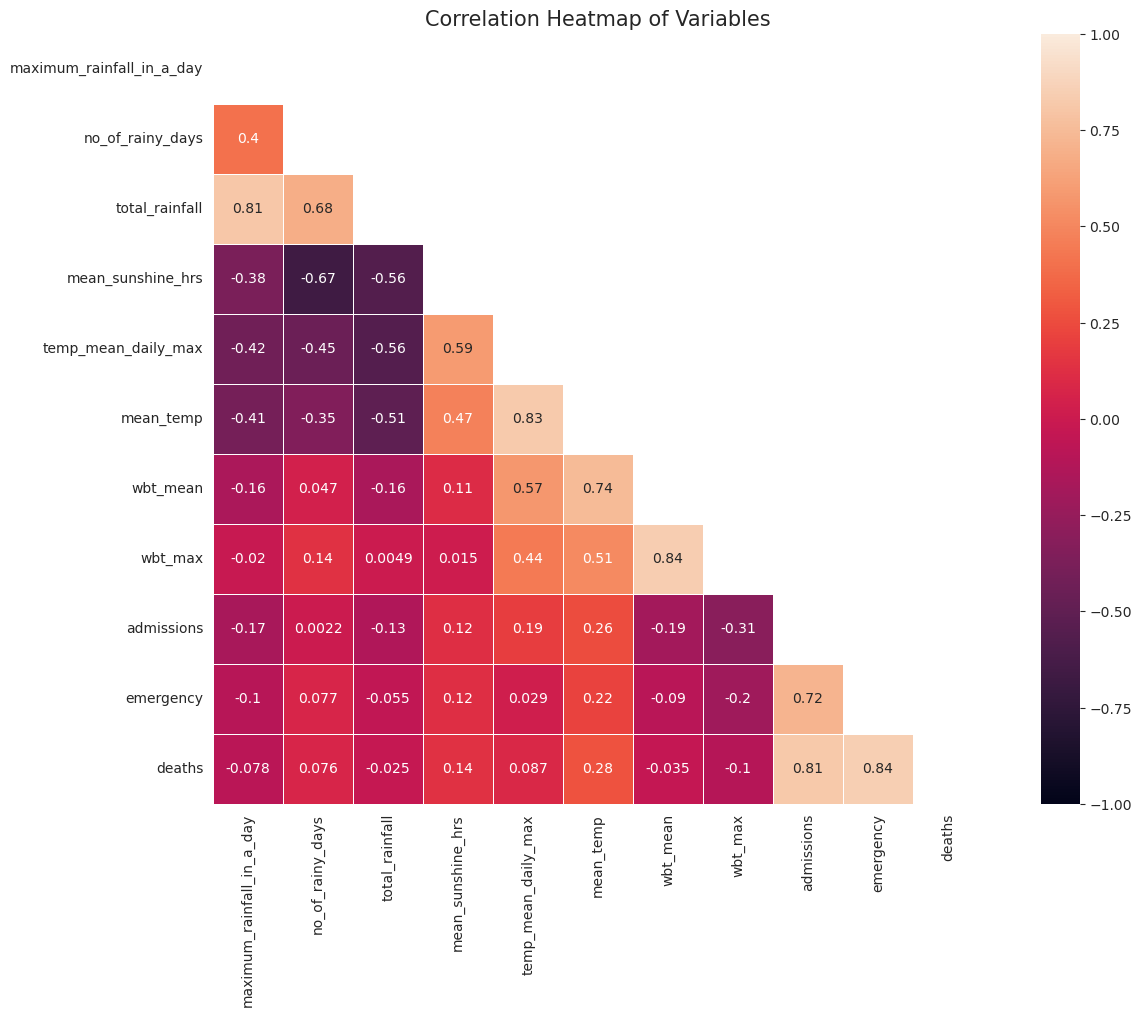

In [21]:
# Plot the correlation matrix in a heatmap to visually identify variables of interest
# for further exploration

# Set figure size
plt.figure(figsize=(15,10))

# Set up mask to mask out upper triangle
mask = np.zeros_like(df_corr)
mask[np.triu_indices_from(mask)] = True

# Plot  correlation heatmap
with sns.axes_style("white"):
    mapplot = sns.heatmap(df_corr, mask = mask, 
                square = True, annot = True, 
                vmin = -1, vmax = 1, linewidths = .5)
    # Specifications for chart
    mapplot.set_title('Correlation Heatmap of Variables', fontdict={'fontsize':15})

plt.show()

#### Observations from correlation heatmap: 

- <b>Outcome variables correlation</b>: admission, emergency and deaths have very strong correlation with each other, which is not surprising. From the perspective of addressing the CEO's problem statement, this suggests that we can simplify the analysis to only look at one outcome variable since the other two will likely have similar variations (e.g., times of high emergency also mean more admissions and deaths). Admissions has the highest correlation with weather variables which will likely yield better insights in the form of stronger predictability with weather variables. On balance, we choose emergencies for further analysis given that there is more data (compared to admissions which only has 192 datapoints), despite having a lower correlation with weather variables.

In [22]:
# Sort weather variables against admissions based on correlation
df_corr['emergency'].abs().sort_values(ascending=False)
# Among the weather variables, admissions has the strongest correlation with wbt_max, mean_temp, wbt_mean, temp_mean_daily_max
# We examine the trends for these variables

emergency                    1.000000
deaths                       0.844020
admissions                   0.717215
mean_temp                    0.218070
wbt_max                      0.204665
mean_sunshine_hrs            0.118961
maximum_rainfall_in_a_day    0.099909
wbt_mean                     0.089919
no_of_rainy_days             0.076864
total_rainfall               0.054567
temp_mean_daily_max          0.028573
Name: emergency, dtype: float64

#### Observations: 

- <b>Choice of weather variables for further analysis</b>: we choose the weather variables with the highest absolute correlation with emergencies, i.e. mean air temperature, max wet-bulb temperature, mean hours of sunshine and maximum rainfaull in a day.

- <b>Interaction with time of year</b>: given that the CEO is interested in understanding which time of year as well, we layer on the month variable to explore the interactions between weather and season.

In [23]:
# Define variables of interest for further analysis
variables = ['mean_temp', 'wbt_max', 'mean_sunshine_hrs', 'maximum_rainfall_in_a_day', 'month']

<Figure size 500x1000 with 0 Axes>

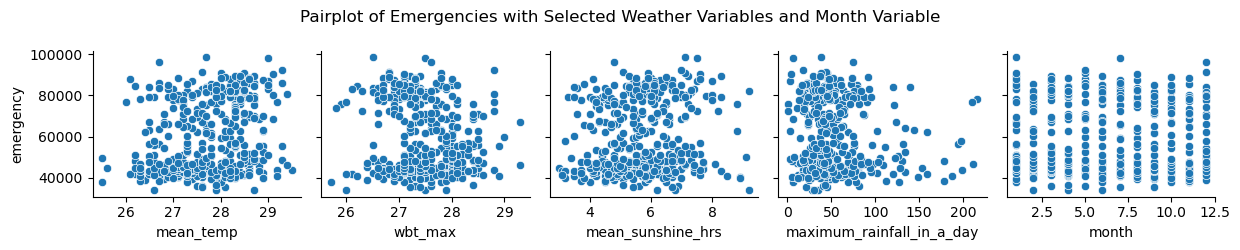

In [24]:
# Create pair-plot to have a quick look at correlation with emergencies
plt.figure(figsize=(5,10))
pairplot = sns.pairplot(df, x_vars=variables, y_vars='emergency')

# Specifications of chart
pairplot.fig.suptitle('Pairplot of Emergencies with Selected Weather Variables and Month Variable')
plt.tight_layout()

#### Observations:

- Unsurprisingly, variables and emergencies does not seem to follow a strong clear pattern, which reflects the weak correlation from the earlier heatmap.

In [25]:
# Create list of month strings for chart labelling
month_list = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

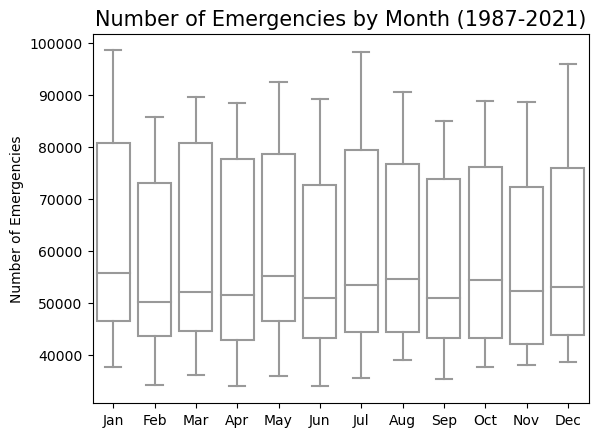

In [26]:
# Plotting boxplots for emergencies variations by month
bplot = sns.boxplot(df, x='month', y='emergency',
                     color='white')
bplot.set_xticklabels(month_list)
bplot.set_xlabel('')
bplot.set_ylabel('Number of Emergencies')
bplot.set_title('Number of Emergencies by Month (1987-2021)', fontdict={'fontsize':15})

plt.show()

#### Observations: 

- No clear period of year where are more emergencies and hence need more resourcing. Range of emergencies roughly similar across the year, albeit, Feb and Sep have a lower median number of emergencies. As such, we will further analyse the interaction with weather variables.

In [27]:
# Function to split numeric variables into percentiles to make plotting of heatmaps easier to interpret
def get_quad_labels(df, variables):
    for variable in variables:
        df[variable + '_quad'] = pd.qcut(df[variable], q=4, labels=['25P', '50P','75P', '100P'])
        
# Function to split numeric variables into percentiles by groups of mth to make plotting of heatmaps easier to interpret
def get_quad_labels_by_mth(df, variables, num_percentiles):
    # Generate labels of percentiles
    per_labels = [str(x) + 'P' for x in np.linspace(0,100,num_percentiles+1,dtype='int')[1:]]
    for variable in variables:
        df[variable + '_quad'] = df.groupby('month')[variable].apply(lambda x: pd.qcut(x, q=num_percentiles, 
                                                                                       labels=per_labels, 
                                                                                       duplicates='drop'))

In [28]:
#df = df['1987-01-01':'2021-12-31']

In [29]:
# Convert weather variables into categorical for easier heatmap plotting, 
# we use quartiles for easier interpretation, given that there are limited datapoints
get_quad_labels_by_mth(df, variables[:-1], 4)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 420 entries, 1987-01-01 to 2021-12-01
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   maximum_rainfall_in_a_day       420 non-null    float64 
 1   no_of_rainy_days                420 non-null    float64 
 2   total_rainfall                  420 non-null    float64 
 3   mean_sunshine_hrs               420 non-null    float64 
 4   temp_mean_daily_max             420 non-null    float64 
 5   mean_temp                       420 non-null    float64 
 6   wbt_mean                        420 non-null    float64 
 7   wbt_max                         420 non-null    float64 
 8   admissions                      192 non-null    float64 
 9   emergency                       420 non-null    float64 
 10  deaths                          420 non-null    float64 
 11  year                            420 non-null    category
 12  mon

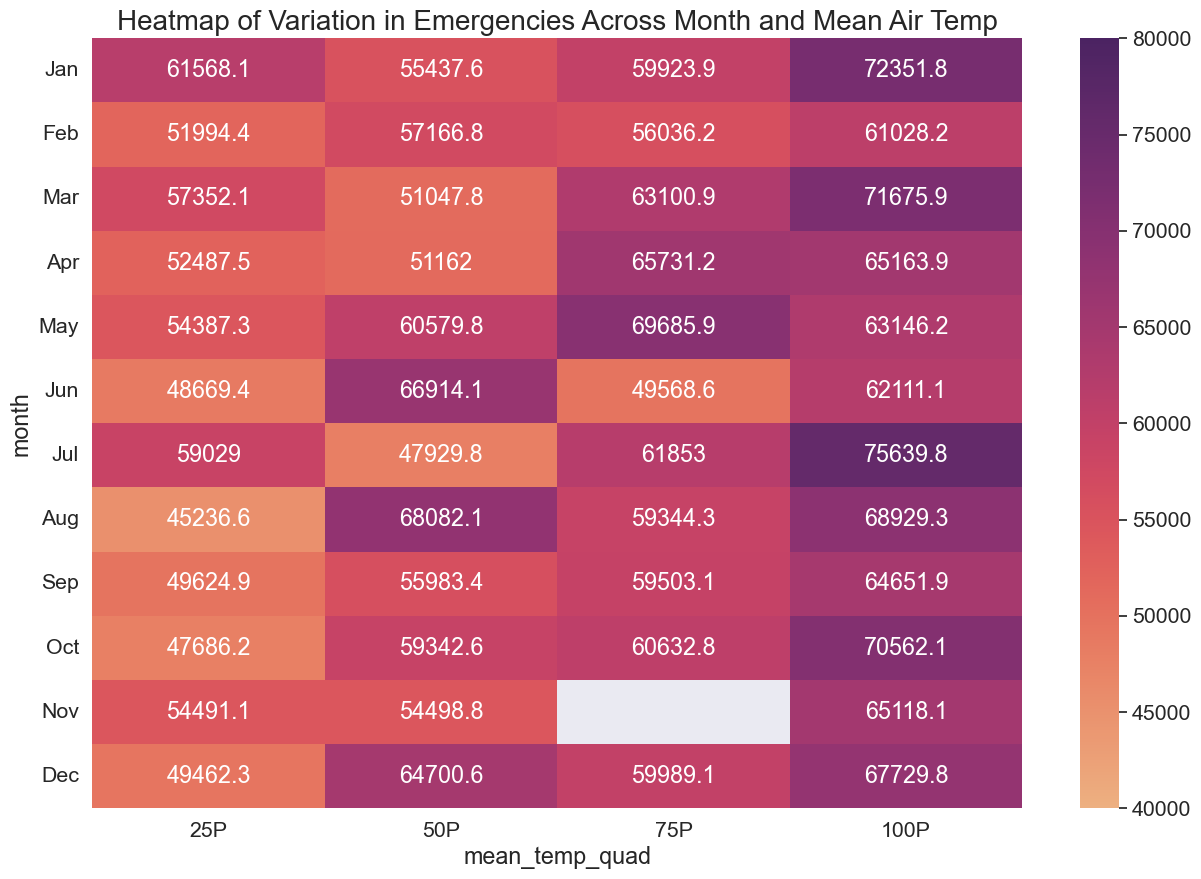

In [30]:
# Heatmap for month vs mean_temp
plt.figure(figsize=(15,10))
sns.set(font_scale=1.4)

mapplot = sns.heatmap(pd.crosstab(df['month'], df['mean_temp_quad'], df['emergency'], aggfunc=np.mean), 
            yticklabels=month_list,
            annot=True, fmt='g', vmax=80000, vmin=40000, cmap='flare')
mapplot.set_title('Heatmap of Variation in Emergencies Across Month and Mean Air Temp',
                 fontdict={'fontsize':20})

plt.yticks(rotation=0)
plt.show()

#### Observations:

- Mean air temp in the highest quartile of historical air temp generally correlated with more emergencies, especially in the months of Jan to Mar and Jul. For Aug to Dec, lowest quartile of mean air temp correlated with lower emergencies.

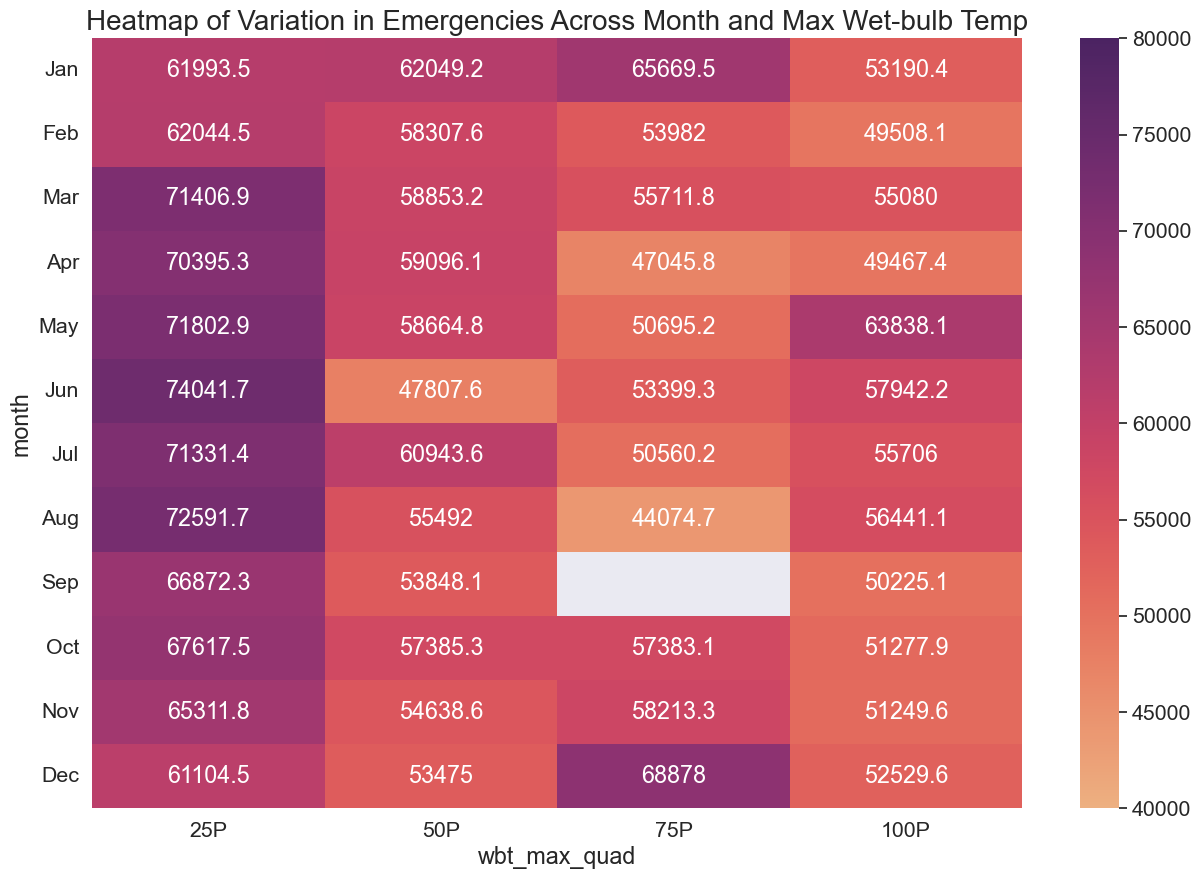

In [31]:
# Heatmap for month vs wbt_max
plt.figure(figsize=(15,10))
sns.set(font_scale=1.4)

mapplot = sns.heatmap(pd.crosstab(df['month'], df['wbt_max_quad'], df['emergency'], aggfunc=np.mean), 
            yticklabels=month_list,
            annot=True, fmt='g', vmax=80000, vmin=40000, cmap='flare')
mapplot.set_title('Heatmap of Variation in Emergencies Across Month and Max Wet-bulb Temp',
                 fontdict={'fontsize':20})

plt.yticks(rotation=0)
plt.show()

#### Observations:

- Max wet-bulb temp in the lowest quartile of historical temp generally correlated with more emergencies, especially in the months of Feb to Nov. 

- Combined with earlier analysis of mean air temp, a combination of these 2 may have a strong correlation to very large numbers of emergencies. We will explore this later.

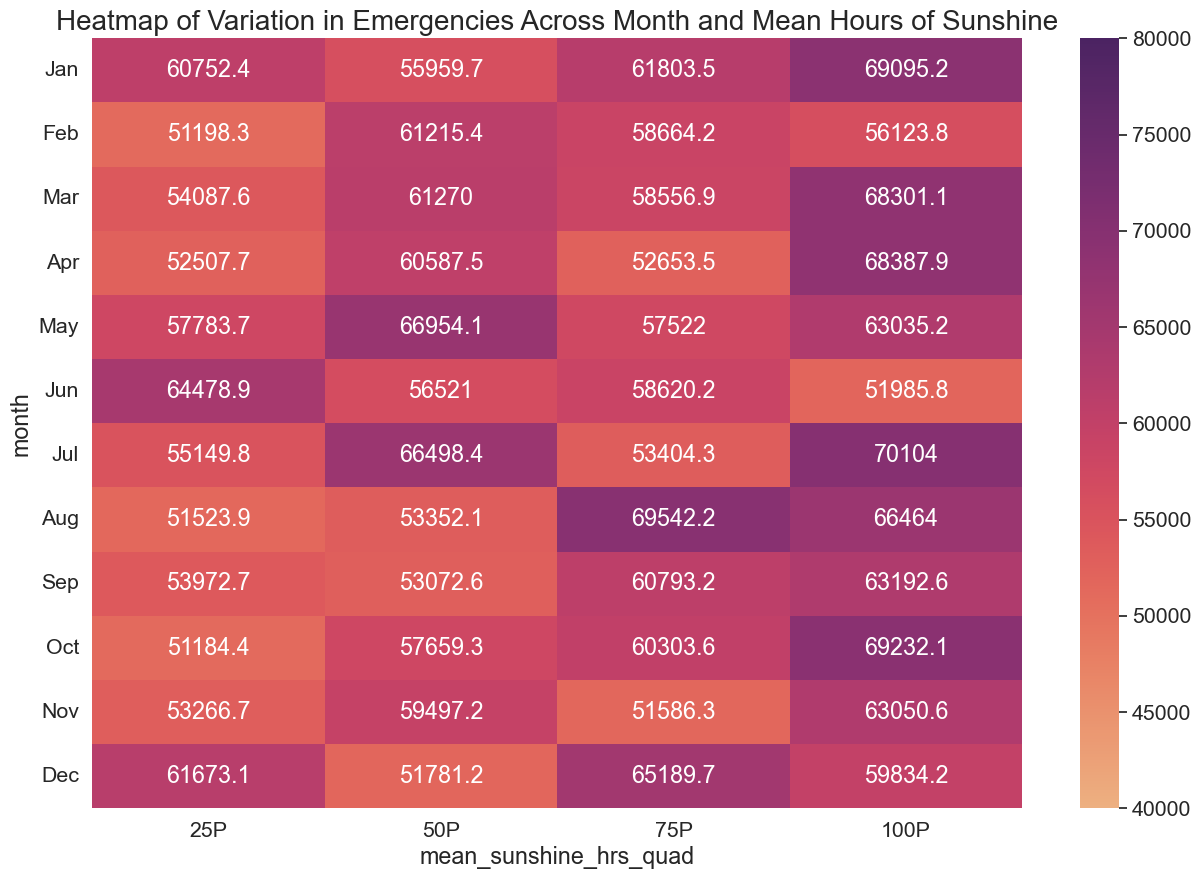

In [32]:
# Heatmap for month vs sunshine
plt.figure(figsize=(15,10))
sns.set(font_scale=1.4)

mapplot = sns.heatmap(pd.crosstab(df['month'], df['mean_sunshine_hrs_quad'], df['emergency'], aggfunc=np.mean), 
            yticklabels=month_list,
            annot=True, fmt='g', vmax=80000, vmin=40000, cmap='flare')
mapplot.set_title('Heatmap of Variation in Emergencies Across Month and Mean Hours of Sunshine',
                 fontdict={'fontsize':20})

plt.yticks(rotation=0)
plt.show()

#### Observations:

- Hours of sunshine in the highest quartile of historical sunshine generally correlated with more emergencies, especially in the months of Mar and Apr. Lowest quartile of sunshine corresponds to lower number of emergencies for months of Jul to Oct.

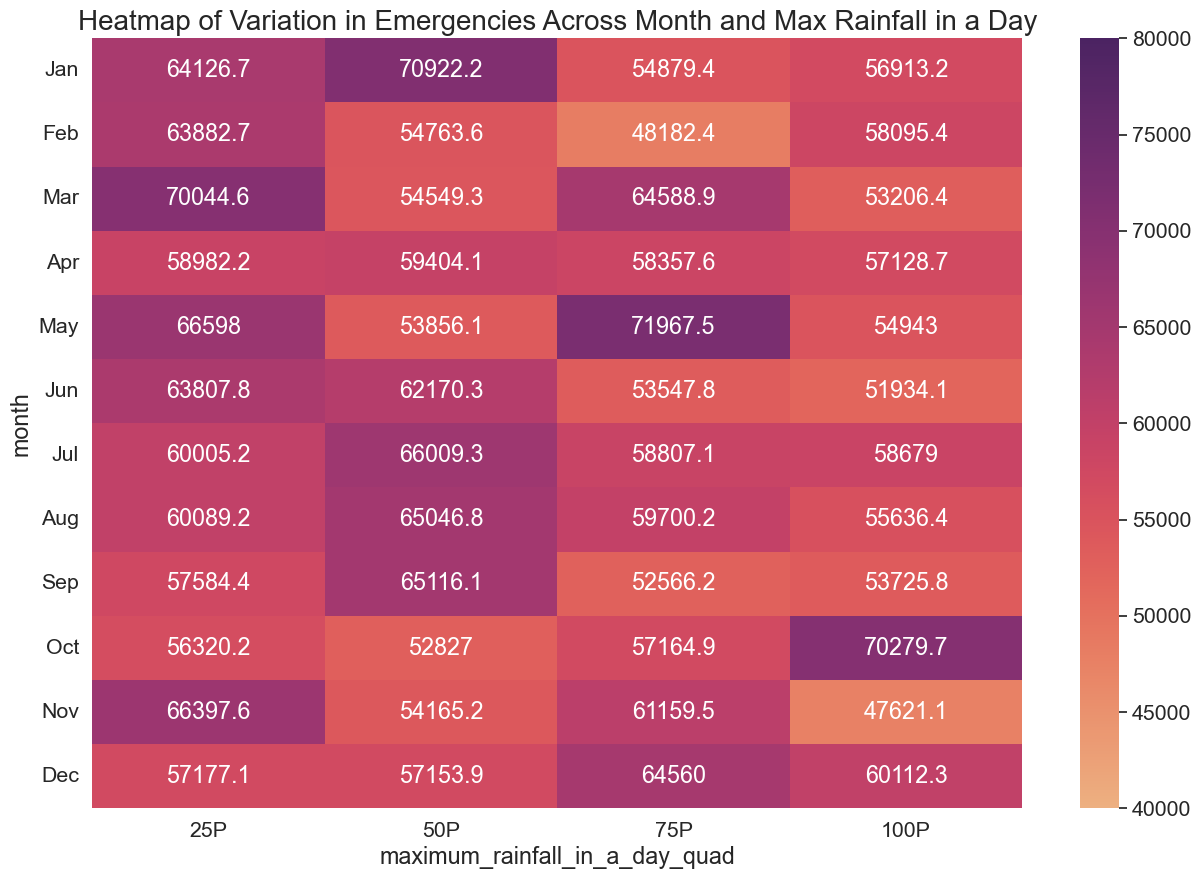

In [33]:
# Heatmap for month vs maximum_rainfall in a day
plt.figure(figsize=(15,10))
sns.set(font_scale=1.4)

mapplot = sns.heatmap(pd.crosstab(df['month'], df['maximum_rainfall_in_a_day_quad'], df['emergency'], aggfunc=np.mean), 
            yticklabels=month_list,
            annot=True, fmt='g', vmax=80000, vmin=40000, cmap='flare')
mapplot.set_title('Heatmap of Variation in Emergencies Across Month and Max Rainfall in a Day',
                 fontdict={'fontsize':20})

plt.yticks(rotation=0)
plt.show()

#### Observations:

- Max rainfall in a day in the lowest quartile of historical rainfall generally correlated with more emergencies, especially in the months of Feb and Mar. Highest quartile of max rainfall corresponds to higher number of emergencies only for Oct.

- Patterns not very clear, which is not very surprising considering that max rainfall in a day has the lowest correlation with emergencies out of the 4 selected variables. In addition, this is a variable that is difficult to forecast ahead of time compared to the other selected variables. Hence, we will focus subsequent analysis on the other 3 selected variables.

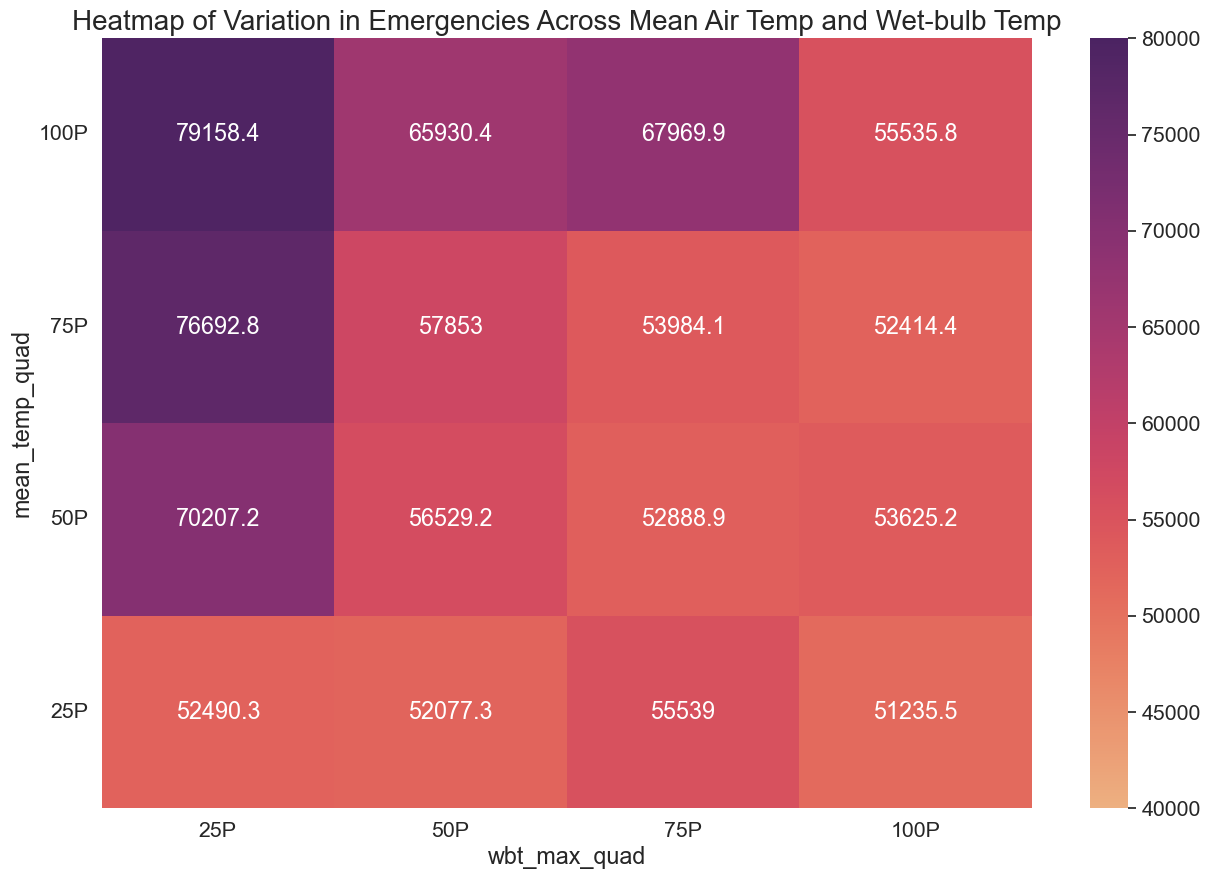

In [34]:
# Plot heatmap to examine interaction of weather variables
plt.figure(figsize=(15,10))
sns.set(font_scale=1.4)

mapplot = sns.heatmap(pd.crosstab(df['mean_temp_quad'], df['wbt_max_quad'], df['emergency'], aggfunc=np.mean), 
            annot=True, fmt='g', vmax=80000, vmin=40000, cmap='flare')
mapplot.invert_yaxis()
mapplot.set_title('Heatmap of Variation in Emergencies Across Mean Air Temp and Wet-bulb Temp',
                 fontdict={'fontsize':20})

plt.yticks(rotation=0)
plt.show()

#### Observations:

- Higher than usual mean air temp (highest quartile) and lower than usual wet-bulb temp (lowest quartile) associated with high number of emergencies. This implies that months where these 2 factors are compounded will likely see very high number of emergencies, i.e. Feb, Mar and Jul.

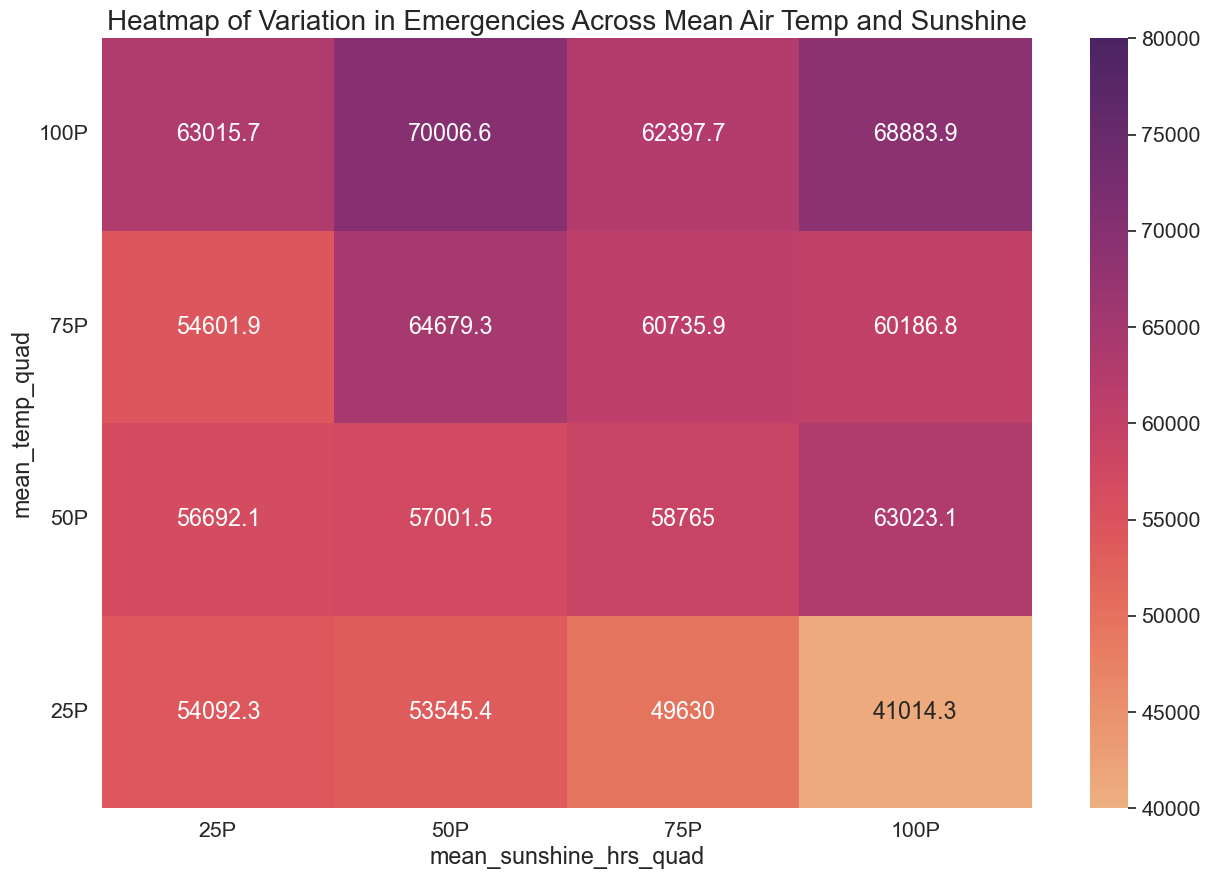

In [35]:
# Plot heatmap to examine interaction of weather variables
plt.figure(figsize=(15,10))
sns.set(font_scale=1.4)

mapplot = sns.heatmap(pd.crosstab(df['mean_temp_quad'], df['mean_sunshine_hrs_quad'], df['emergency'], aggfunc=np.mean), 
            annot=True, fmt='g', vmax=80000, vmin=40000, cmap='flare')
mapplot.invert_yaxis()
mapplot.set_title('Heatmap of Variation in Emergencies Across Mean Air Temp and Sunshine',
                 fontdict={'fontsize':20})

plt.yticks(rotation=0)
plt.show()

#### Observations:

- Higher than usual sunshine hours (highest quartile) and lower than usual mean air temp (lowest quartile) associated with very low number of emergencies. This implies that the month of Jun where these 2 factors are compounded will likely see very low number of emergencies.

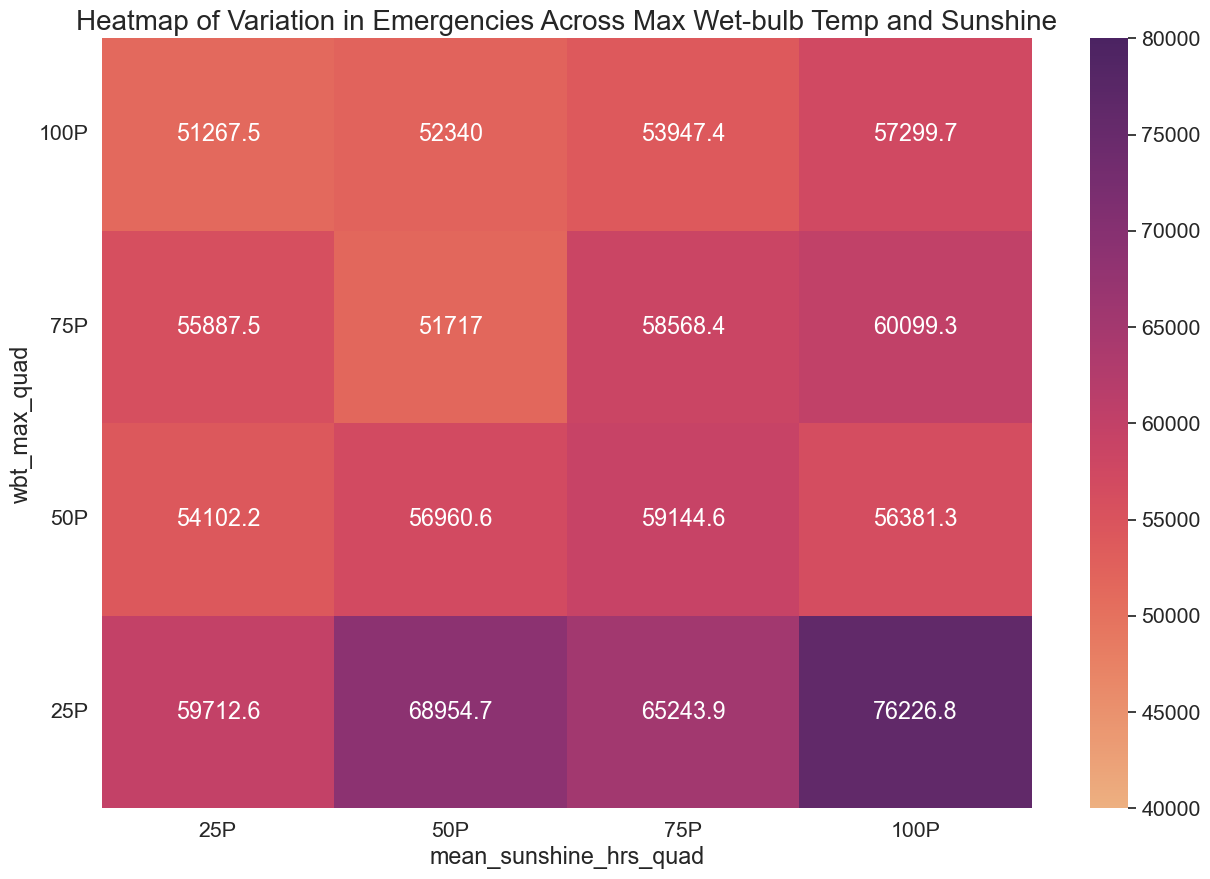

In [36]:
# Plot heatmap to examine interaction of weather variables
plt.figure(figsize=(15,10))
sns.set(font_scale=1.4)

mapplot = sns.heatmap(pd.crosstab(df['wbt_max_quad'], df['mean_sunshine_hrs_quad'], df['emergency'], aggfunc=np.mean), 
            annot=True, fmt='g', vmax=80000, vmin=40000, cmap='flare')
mapplot.invert_yaxis()
mapplot.set_title('Heatmap of Variation in Emergencies Across Max Wet-bulb Temp and Sunshine',
                 fontdict={'fontsize':20})

plt.yticks(rotation=0)
plt.show()

#### Observations:

- As expected, higher than usual sunshine hours (highest quartile) and lower than usual max wet-bulb temp (lowest quartile) associated with very high number of emergencies. Given that there is a strong correlation between wet-bulb temp and air temp, we will simplify the analysis by only concluding on the air temp and sunshine relationship.

---

## Conclusions and Recommendations

1. Weather plays a part in the expected resourcing needed for the hospital in part due to the number of emergency cases (and by extension admissions and deaths which are highly correlated) associated with different weather conditions during different periods of the year. A combination of uncharacteristic weather conditions can also have an impact on the number of emergency cases.

2. To summarise the analysis, higher resourcing should be prepared under these circumstances:
    - Mean air temp and sunshine are higher than usual for any given month (i.e. in highest quartile). This is likely related to higher risk of heat-related injuries due to higher temperatures and sun exposure.
    - Max wet-bulb temp is lower than usual for any given month (i.e. in lowest quartile). This is likely due to strong negative correlation between air temp and wet-bulb temp, given that scientific literature suggests higher wet-bulb temp to be more associated with heat-related incidents due to increasing difficulty of the human body to cool down when both humidity and temperatures are high (i.e. higher wet-bulb temp).
    - In months of Feb, Mar and Jul, particularly when mean air temp is higher than usual.
   
   <br>

3. On a brighter note, lower resourcing can be prepared under these circumstances:
    - In the month of Jun, when sunshine hours is higher than usual and mean air temp is lower than usual.

